# Loan Application Status Prediction
## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
#### Independent Variables:
* Loan_ID
* Gender
* Married
* Dependents
* Education
* Self_Employed
* ApplicantIncome
* CoapplicantIncome
* Loan_Amount
* Loan_Amount_Term
* Credit History
* Property_Area

#### Dependent Variable (Target Variable):
* Loan_Status
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 
#### Downlaod Files:
•	https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# Import the libraries

In [59]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df=pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 5\loan_prediction.csv")
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#### Shape

In [3]:
df.shape

(614, 13)

Shape of the dataset is 614 rows x 13 columns

#### Check the concise summary of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation:

    * The dataset has 12 features which have 3 different datatypes:
        1. float64 = 4 features
        2. int64 = 1 feature
        3. object = 7 feature
        4. object = 1 label

#### Check for null values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values present in some of the features.

#### Check for duplicate variables

In [6]:
df.duplicated().sum().sum()

0

There are no duplicate variables in the dataset

#### Check the statistical summary of the dataframe

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


As there are 5 numerical features, so its shows five statistical summary of the dataset. Here we can find the mean. standard deviation, minimum and maximum values and the Ist, IInd, IIIrd quantile of the features.

#### Check for uniquiness in feature columns

In [8]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Data Pre-processing

In [9]:
df['Education'] = df['Education'].replace('Not Graduate', 'Not_Graduate')
df.Education.unique()
df['Dependents'] = df['Dependents'].replace('3+', 'More_then_2')
df['Dependents'] = df['Dependents'].replace('2', 'Two')
df['Dependents'] = df['Dependents'].replace('1', 'One')
df['Dependents'] = df['Dependents'].replace('0', 'Zero')
df.Dependents.unique()

array(['Zero', 'One', 'Two', 'More_then_2', nan], dtype=object)

In feature - 'Education' and 'Dependents', changing one of the class name for easy handling. 

#### Treating the missing values, and coding the classes into numbers.

In [10]:
def data_pipeline(df):
    df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
    df.Gender.replace(to_replace=dict(Female=1, Male=0), inplace=True)
    df["Married"].fillna(df["Married"].mode()[0], inplace=True)
    df.Married.replace(to_replace=dict(Yes=1, No=0), inplace=True)
    df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
    df.Dependents.replace(to_replace=dict(Zero=0, One=1, Two=2, More_then_2=3), inplace=True)
    df.Education.replace(to_replace=dict(Not_Graduate=0, Graduate=1), inplace=True)
    df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
    df.Self_Employed.replace(to_replace=dict(Yes=1, No=0), inplace=True)
    df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
    df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
    df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
    df.Property_Area.replace(to_replace=dict(Urban=0, Rural=1, Semiurban=2), inplace=True)
    df.Loan_Status.replace(to_replace=dict(Y=1, N=0), inplace=True)
    df=df.drop(["Loan_ID"], axis=1)
    return df

In [11]:
df = data_pipeline(df)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


Here, we have seen treated:

    * Filled the null values of 'Gender' by mode. EnCoded Female = 1, Male = 0
    * Filled the null values of 'Married' by mode. Encoded Yes = 1, No = 0
    * Filled the null values of 'Dependents' by mode.
    * In Feature 'Education', encoded Not_Graduate = 0, Graduate = 1
    * Filled the null values of 'Self_Employed' by mode. Encoded Yes = 1, No = 0
    * Filled the null values of 'LoanAmount' by mean.
    * Filled the null values of 'Loan_Amount_Term' by mode.
    * Filled the null values of 'Credit_History' by mode.
    * In Feature 'Property_Area', encoded Urban=0, Rural=1, Semiurban=2
    * In feature 'Loan_Status', encoded Y=1, N=0
    * Dropped the column 'Loan_ID', which have no such correlation with 'Loan_Status'

# Data Interpretation and Visualization

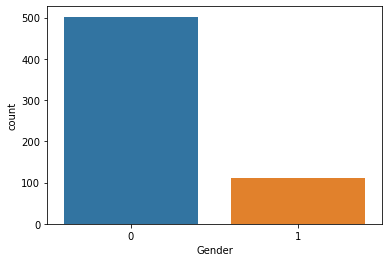

In [13]:
sns.countplot(x='Gender', data=df)
plt.show()

Shows the number of males and female

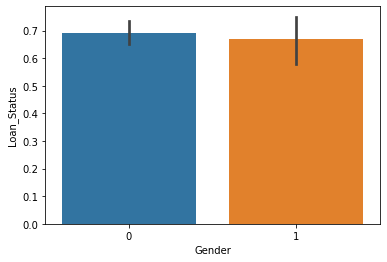

In [14]:
sns.barplot(x='Gender', y='Loan_Status', data=df)
plt.show()

THis graph shows the relationship between Loan_Status and Gender

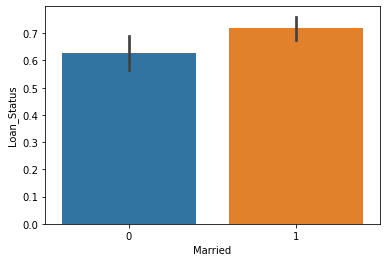

In [15]:
sns.barplot(x='Married', y='Loan_Status', data=df)
plt.show()

THis shows that those who are married, have got more positive Loan Status

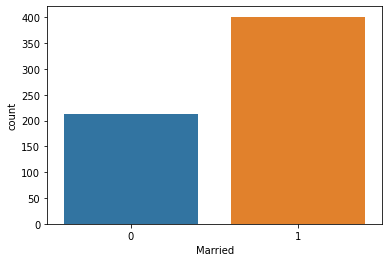

In [16]:
sns.countplot(x='Married', data=df)
plt.show()

This graph shows the number of married(1) and unmarried(0) person.

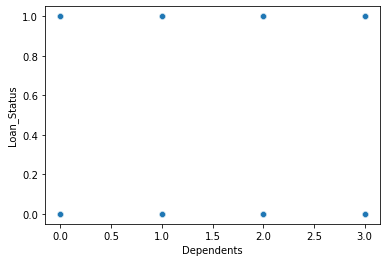

In [17]:
sns.scatterplot(x='Dependents', y='Loan_Status', data=df)
plt.show()

The above graph shows the direction of relationship betweet the variables.

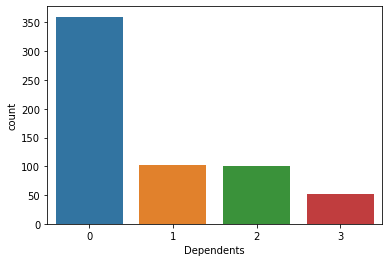

In [18]:
sns.countplot(x='Dependents', data=df)
plt.show()

THe above shows the count of each class of the Dependent feature.

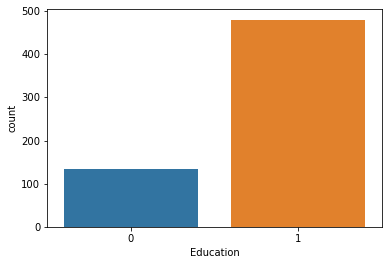

In [19]:
sns.countplot(x='Education', data=df)
plt.show()

The above shows the number of educated person and uneducated person.

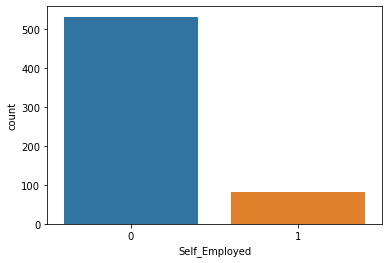

In [20]:
sns.countplot(x='Self_Employed', data=df)
plt.show()

This shows the count of self-employed(1) and not- self employed(0)

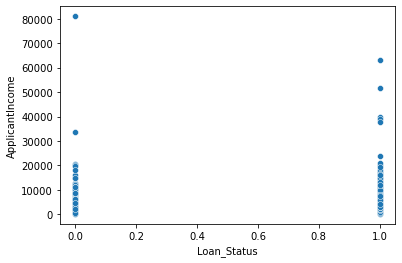

In [21]:
sns.scatterplot(y='ApplicantIncome', x='Loan_Status', data=df)
plt.show()

This above plot shows people's income and whether the get loan or not.

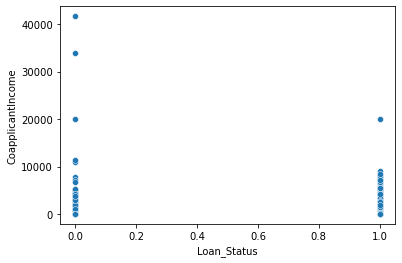

In [22]:
sns.scatterplot(y='CoapplicantIncome', x='Loan_Status', data=df)
plt.show()

This above plot shows coapplicant's income and whether it helps the applicant to get loan or not.

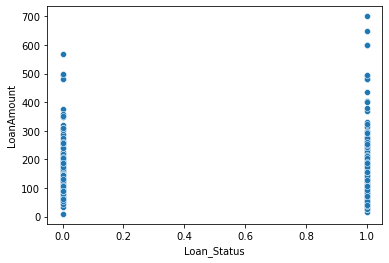

In [23]:
sns.scatterplot(y='LoanAmount', x='Loan_Status', data=df)
plt.show()

The above shows the relation between LoanAmount and Loan_status

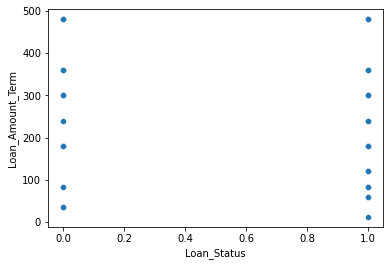

In [24]:
sns.scatterplot(y='Loan_Amount_Term', x='Loan_Status', data=df)
plt.show()

THe above shows the relation between Loan_Amount_Term and Loan_status

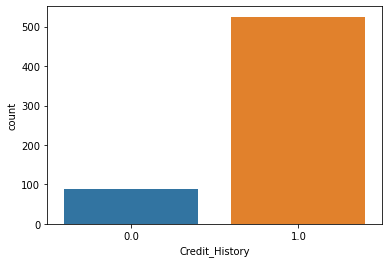

In [25]:
sns.countplot(x='Credit_History', data=df)
plt.show()

This shows the number of credit_history or not of the applicants.

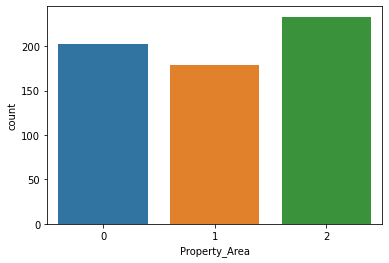

In [26]:
sns.countplot(x='Property_Area', data=df)
plt.show()

This is the count plot between the applicants living in Urban=0, Rural=1, Semiurban=2 area.

# Correlation

Lets check the correlation of the features with the Label- Loan_status

In [27]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.074030,-0.009170,0.082045,-0.017987
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,0.003071,0.091478
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,0.001781,0.010118
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.073928,0.073658,0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,0.021996,-0.003700
ApplicantIncome,-0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,-0.007894,-0.004710
CoapplicantIncome,-0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,-0.028356,-0.059187
LoanAmount,-0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,0.013799,-0.036416
Loan_Amount_Term,0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,0.086879,-0.022549
Credit_History,-0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,0.030248,0.540556


In [28]:
df.corr()['Loan_Status'].sort_values()

CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
Gender              -0.017987
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Education            0.085884
Married              0.091478
Property_Area        0.103253
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

Since Gender, ApplicantIncome and Self_Employed have minor or very less correlation with loan income, lets drop it.

In [29]:
df=df.drop(["Gender","ApplicantIncome","Self_Employed"], axis=1)
df.head()

,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1508.0,128.000000,360.0,1.0,1,0
2,1,0,1,0.0,66.000000,360.0,1.0,0,1
3,1,0,0,2358.0,120.000000,360.0,1.0,0,1
4,0,0,1,0.0,141.000000,360.0,1.0,0,1


## Correlation using heatmap

#### Visualizing Correlation using heatmap

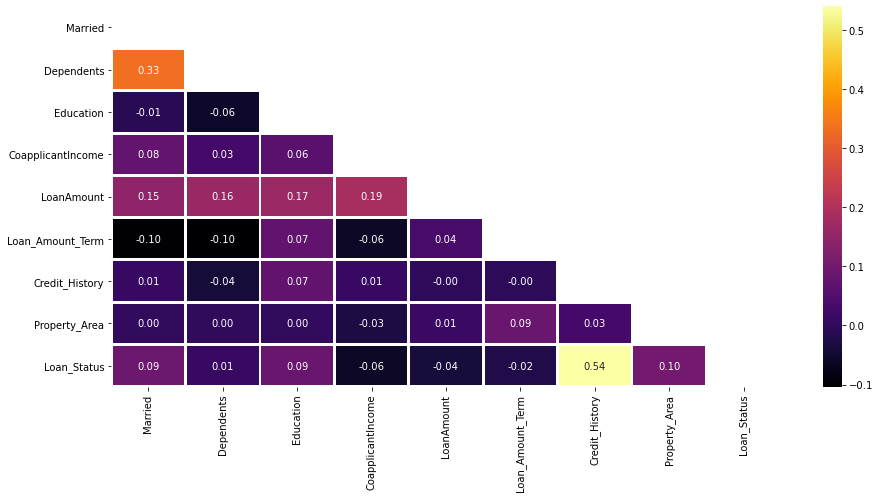

In [30]:
plt.figure(figsize = (15,7))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, fmt = '.2f',linewidths=2, mask=matrix, cmap='inferno')
plt.show()

#### Visualizing Variables summary using Heat map

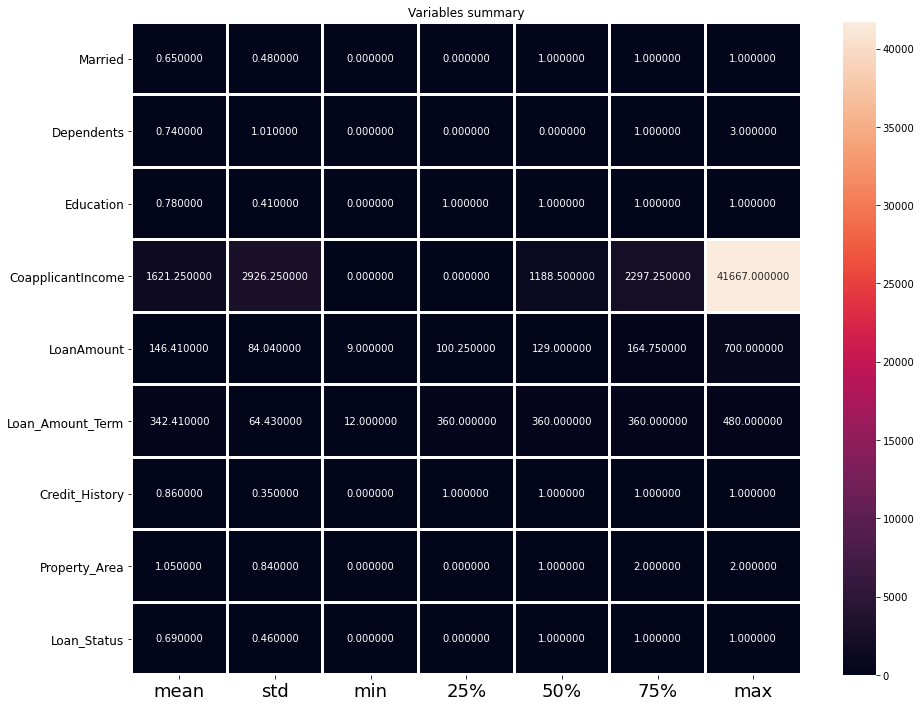

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2, annot = True, fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

## Finding Outliers

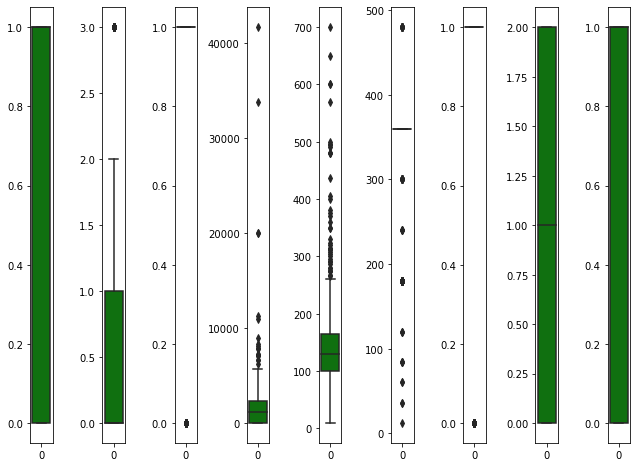

In [32]:
collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(data = df[collist[i]], color='green', orient='v')
    plt.tight_layout()

## Skewness

In [33]:
df.skew()

Married             -0.644850
Dependents           1.015551
Education           -1.367622
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.095601
Loan_Status         -0.809998
dtype: float64

##### lets see how the data is distributed for every column

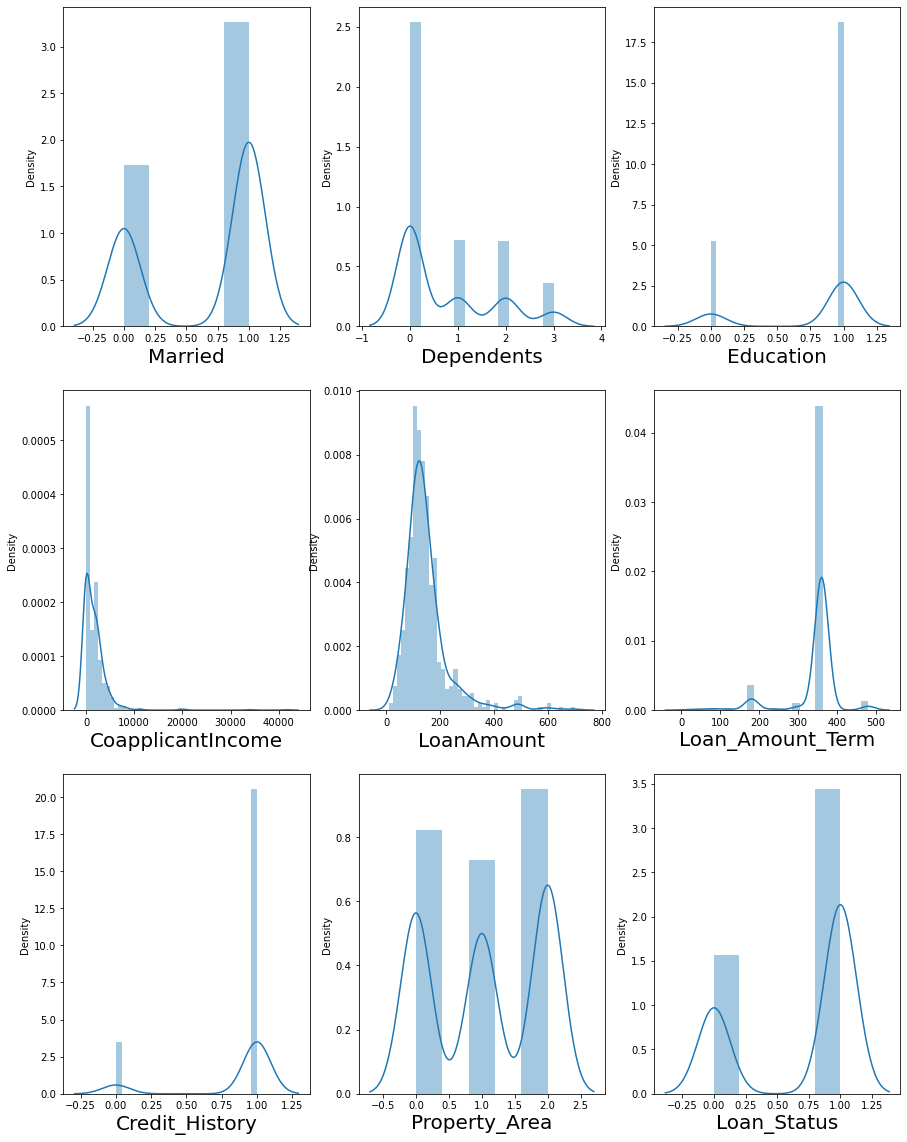

In [34]:
plt.figure(figsize = (15,20))
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.show()

### Removing Outliers:
#### Z-Score Technique:

In [35]:
from scipy.stats import zscore

In [36]:
z= np.abs(zscore(df))
z.shape

(614, 9)

In [37]:
threshold=3
# index number
print(np.where(z>3))

(array([  9,  14,  68,  94, 130, 133, 155, 171, 177, 177, 242, 262, 278,
       308, 313, 333, 369, 402, 417, 432, 487, 495, 497, 506, 523, 525,
       546, 561, 575, 581, 585, 600, 604], dtype=int64), array([3, 5, 5, 5, 4, 5, 4, 4, 3, 4, 5, 5, 4, 4, 5, 4, 4, 3, 3, 4, 4, 5,
       5, 4, 4, 4, 5, 4, 5, 3, 5, 3, 4], dtype=int64))


In [38]:
len(np.where(z>3)[0])

33

In [39]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 9)
(582, 9)


In [40]:
loss_percent=(614-582)/614*100
print(loss_percent, '%')

5.211726384364821 %


Checking whether how much outliers are still there. If the outliers there help in the testing the model or not.

#### Model without outliers is df and mdel with desired outliers is df_new1:

Dividing data in features and vectors:

In [41]:
# independent column/features
x=df_new.iloc[:,:-1]
# target
y=df_new.iloc[:,-1]

#### Transforming data to remove skewness:

In [42]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [43]:
x

array([[-1.36638028e+00, -8.14462909e-01,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -1.28609606e+00],
       [ 7.31860679e-01,  8.88791720e-01,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -2.14622347e-03],
       [ 7.31860679e-01, -8.14462909e-01,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -1.28609606e+00],
       ...,
       [ 7.31860679e-01,  8.88791720e-01,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -1.28609606e+00],
       [ 7.31860679e-01,  1.33659450e+00,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -1.28609606e+00],
       [-1.36638028e+00, -8.14462909e-01,  5.38948636e-01, ...,
         1.29897450e-01, -2.38529981e+00,  1.10656114e+00]])

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.36638028e+00, -8.14462909e-01,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -1.28609606e+00],
       [ 7.31860679e-01,  8.88791720e-01,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -2.14622347e-03],
       [ 7.31860679e-01, -8.14462909e-01,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -1.28609606e+00],
       ...,
       [ 7.31860679e-01,  8.88791720e-01,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -1.28609606e+00],
       [ 7.31860679e-01,  1.33659450e+00,  5.38948636e-01, ...,
         1.29897450e-01,  4.19234512e-01, -1.28609606e+00],
       [-1.36638028e+00, -8.14462909e-01,  5.38948636e-01, ...,
         1.29897450e-01, -2.38529981e+00,  1.10656114e+00]])

#### Since the outcome "Loan_Status" has only two variable we will use binary classification model.

## Preprocessing and Classification

#### First of all we split the Loan_Status column from the other columns and use SMOTE to make the "Loan_Status" column distribution equal

In [45]:
x = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

# Show distribution of 0 and 1
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
y.value_counts()

0    422
1    422
Name: Loan_Status, dtype: int64

## Split train and test dataset

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

# Model Building

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

##### As it is a classification problem, I will use five ML Algorithms:
1. Logistic Regression
2. Naive Bayes
3. Decision Tree 
4. Random forest
5. KNeighborsClassifier

##### Then, 
* See the confusion matrix of all the Machine learning algorithms 
##### among the best model I get, will find :
* The hyper parameter tuning of the best algorithm
* The cross validation of that Machine learning algorithm
* Have a classification reports of that Machine learning algorithm
* Find out the AUC-ROC score and plot ROC Curve.

##### Finally:
- Save the model with the best accuracy score.

In [49]:
# Create empty list and append each model to list
models = []
models.append(("LOGR", LogisticRegression()))
models.append(("NAIVE BAYES", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("KNN", KNeighborsClassifier()))

# Empty list for results of the evaluation
model_results = []

In [50]:
# Function: for each element in model list there will be an evaluation -> Results will be added to results df
def train_all_models(models):
    i = 1
    plt.figure(figsize=(15, 20))
    for method, model in models:
        model.fit(X_train, y_train)
        test_pred = model.predict(X_test)

        f_score = model.score(X_test, y_test)
        model_results.append((method, f_score))

        plt.subplot(3, 2, i)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Greens")
        plt.title(model, fontsize=14)
        plt.xlabel('Test', fontsize=12)
        plt.ylabel('Predict', fontsize=12)
        df = pd.DataFrame(model_results).transpose()
        i+=1

# Show confusion matrix for each trained model 
    plt.show()
    df = pd.DataFrame(model_results)
    return df

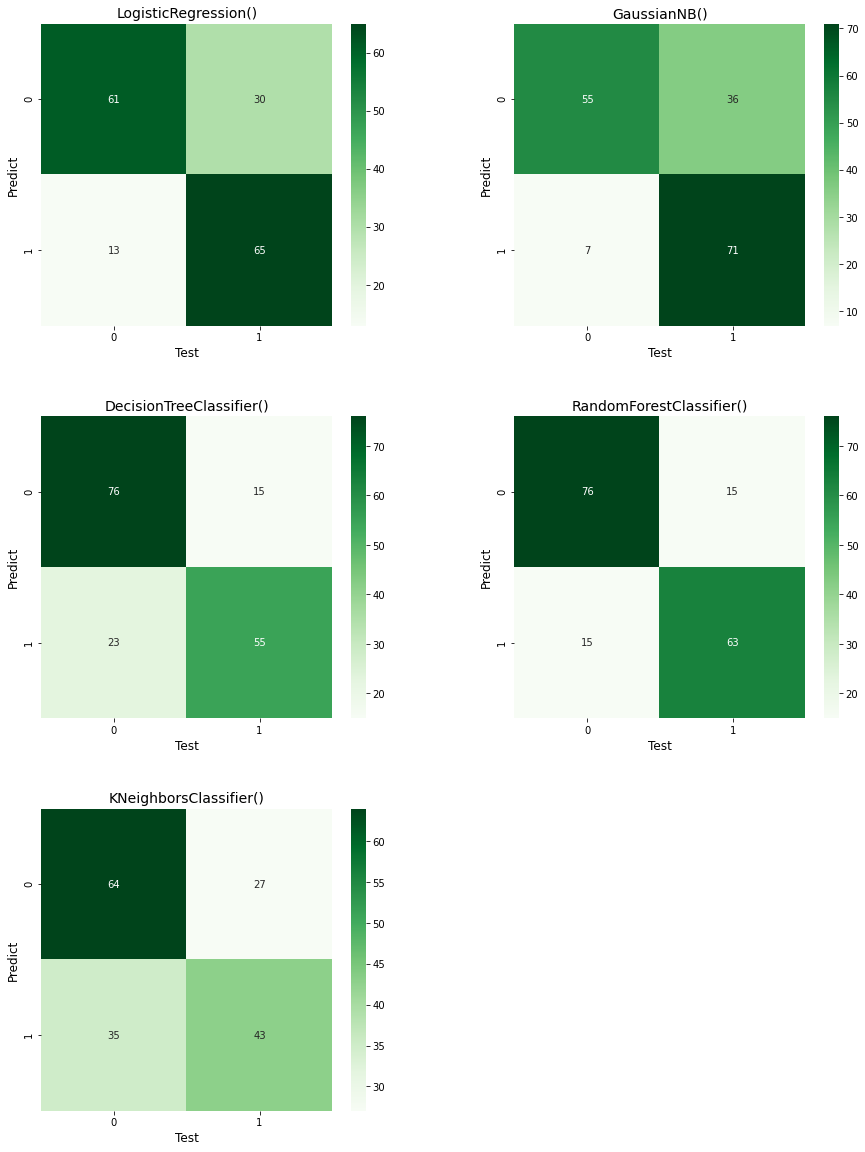

In [51]:
# Sort results df for later visualizations    
best_models = train_all_models(models)
best_models = best_models.sort_values([1], ascending=False)

In [52]:
best_models

,0,1
3,RF,0.822485
2,DT,0.775148
0,LOGR,0.745562
1,NAIVE BAYES,0.745562
4,KNN,0.633136


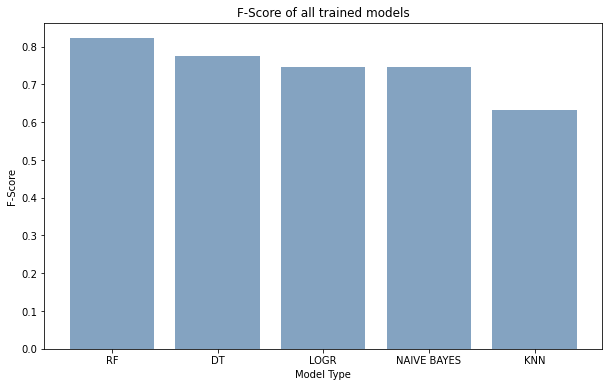

In [53]:
y_pos = np.arange(len(best_models[0]))
plt.figure(figsize=(10, 6))
plt.bar(y_pos, best_models[1], color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, best_models[0])
plt.title('F-Score of all trained models')
plt.xlabel('Model Type')
plt.ylabel('F-Score')
plt.show()

### Hyperparameter Tuning of best  model

In [75]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# Grid Search for RandomForestClassifier
grid_param_RF = {
    "n_estimators": randint(low=1, high=100),
    "max_depth": randint(low=10, high=100),
    "max_features": randint(low=1, high=4)
}

RF_grid_search = RandomizedSearchCV(estimator=rf, param_distributions=grid_param_RF, cv= 10, verbose=1, random_state=14)
RF_grid_search.fit(X_train, y_train)

RF_best_grid = RF_grid_search.best_estimator_
print(RF_best_grid)
print(RF_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
RandomForestClassifier(max_depth=77, max_features=1, n_estimators=78)
0.8089991220368745


#### Taking the Model and train it again with best Hyperparameters

In [77]:
best_model = RandomForestClassifier(max_depth=36, max_features=2, n_estimators=88)
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)

print("Classification report\n",classification_report(pred, y_test))
print("Score = ",best_model.score(X_test,y_test))

Classification report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        91
           1       0.79      0.79      0.79        78

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.81      0.81      0.81       169

Score =  0.8106508875739645


## Cross Validation for Random Forest Classifier

In [79]:
rfc=accuracy_score(y_test,pred)
for j in range(2,10):
    rfscore=cross_val_score(rf,x,y,cv=j)
    rnfc=rfscore.mean()
    print('At cv:-', j)
    print('Cross validation score is:-',rnfc*100)
    print('Accuracy_score is:-',rfc*100)
    print('\n')

At cv:- 2
Cross validation score is:- 79.97630331753555
Accuracy_score is:- 81.06508875739645


At cv:- 3
Cross validation score is:- 78.79870102555043
Accuracy_score is:- 81.06508875739645


At cv:- 4
Cross validation score is:- 78.90995260663507
Accuracy_score is:- 81.06508875739645


At cv:- 5
Cross validation score is:- 80.33530571992111
Accuracy_score is:- 81.06508875739645


At cv:- 6
Cross validation score is:- 81.17359000337726
Accuracy_score is:- 81.06508875739645


At cv:- 7
Cross validation score is:- 80.23711137347499
Accuracy_score is:- 81.06508875739645


At cv:- 8
Cross validation score is:- 81.07704402515724
Accuracy_score is:- 81.06508875739645


At cv:- 9
Cross validation score is:- 80.93622105289916
Accuracy_score is:- 81.06508875739645




In [81]:
rfscore_selected = cross_val_score(rf,x,y,cv=5).mean()
print("The cv score is:-", rfscore_selected,'\nThe accuracy score is:-',rfc)

The cv score is:- 0.8010073260073259 
The accuracy score is:- 0.8106508875739645


### ROC AUC curve for Logistic Regression

In [82]:
rf_roc=roc_auc_score(y_test, pred)
rf_roc

0.8095238095238094

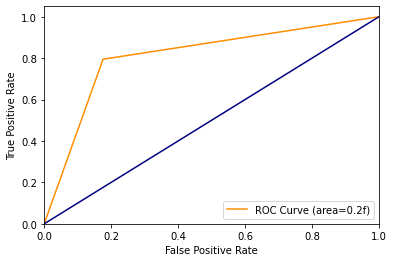

In [83]:
fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange', label='ROC Curve (area=0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Saving the best model

In [84]:
import joblib
joblib.dump(rf,'Loan Application Status Prediction.pkl')

['Loan Application Status Prediction.pkl']